# Python - using pandas

### Slicing & Dicing with our Yerevan Apartments data

In [145]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
# pandas can read gzip files without any problem!
df = pd.read_csv('C:\\Users\\Hakob\\Desktop\\subjects\\DataSci_and_ML\\ML_Arsen_M\\Practical1\\yerevan_april_9.csv.gz')

# delete the semicolon (;) to see each comand's output
len(df); #length of vertical size (number of rows)
len(df.columns); # number of columns
df.columns; # to see the names of the columns (features)
df.describe; # to see some description of the data
df.head(); # to see first 5 rows of the data frame

#-----------------------------------
# indexing. 
#-----------------------------------
# the following produce a SERIES object
df.district 
df['district']; # 'district' is the name one of the columns of our dataframe df, one of the features
df.loc[:, 'district']; # selects by column label
df.iloc[:, 3]; 
df.ix[:, 3]; # can be used whenever you want to use a hybrid approach of either
#------------------------------------
# [[]] these produce a DATAFRAME object
df[['district']];
df.loc[:, ['district']]; # selects by column index
df.iloc[:, [3]];

#------------------------------------
#Row Indexing:
#------------------------------------
# We can use any of the .loc[], .iloc[], or .ix[] methods to 
# do selection by row, noting that the expected order is 
# [row_indexer, column_indexer]:
df.iloc[0:2, :]; # are non-inclusive of the range of values selected
df[0:2];

df.loc[0:2, :]; # are inclusive of the range of values selected
df.ix[0:2];
#------------------------------------
# Boolean Indexing:
#------------------------------------
df.num_rooms > 5;
df[df.num_rooms > 5]  # new series that has the same dimensions, however only values  
                      # corresponding to True values in the boolean series get returned
df[(df.num_rooms > 3) & (df.num_bathrooms == 2) & (df.district == 'Center') & (df.max_floor > 16)];


#-----------------------------------
# Handling categorical variables 
#-----------------------------------
# df.district = df.district.astype('category').cat.codes  # encodes numerically but orders numbers by alphabetical order
                                                          # e.g., Arabkir will be 1, Center will be 3
df = pd.get_dummies(df, columns=['district']) # each one of the categories is exploited into its own binary column(boolean)
                                              # producing new columns named 'district_Center', 'district_Erebuni', etc.
                                              # print df.head() to see the result

### Dropping Data
 
You should always first try to fill in missing data rather that deleting it. This is so important that we've included a link in the dive deeper section that provides a very comprehensive argument and explanation for this. But if all else fails and you've given up on rectifying your nans, you can always remove the sample or column completely, so that it no longer negatively impacts your analysis. This should ever be used as a last resort:

In [146]:
df = df.dropna(axis=0)  # remove any row with nans
#df = df.dropna(axis=1)  # remove any column with nans (not recommended)

# Drop any row that has at least 4 NON-NaNs within it:
df = df.dropna(axis=0, thresh=4)
df.head()

,Unnamed: 0,price,condition,max_floor,street,num_rooms,region,area,url,num_bathrooms,...,district_Center,district_Davtashen,district_Erebuni,district_Malatia-Sebastia,district_Nor Norq,district_Norq Marash,district_Nubarashen,district_Qanaqer-Zeytun,district_Shengavit,district_Vahagni district
0,0,65000.0,good,9,Vardanants St,3,Yerevan,80.0,http://www.myrealty.am/en/item/24032/3-senyaka...,1,...,1,0,0,0,0,0,0,0,0,0
1,1,140000.0,newly repaired,10,Hr.Kochar St,4,Yerevan,115.0,http://www.myrealty.am/en/item/17599/4-senyaka...,1,...,0,0,0,0,0,0,0,0,0,0
2,2,97000.0,newly repaired,10,Teryan St,2,Yerevan,72.0,http://www.myrealty.am/en/item/29472/2-senyaka...,1,...,1,0,0,0,0,0,0,0,0,0
3,3,47000.0,good,9,D. Demirchyan St,1,Yerevan,43.0,http://www.myrealty.am/en/item/37186/1-senyaka...,1,...,1,0,0,0,0,0,0,0,0,0
4,4,51000.0,newly repaired,14,Sayat Nova Ave,1,Yerevan,33.0,http://www.myrealty.am/en/item/37184/1-senyaka...,1,...,1,0,0,0,0,0,0,0,0,0


There may be cases where you want to get rid of non-nan values. For instance, if your dataset has a column you don't need:

In [147]:
# Axis=1 for columns
df = df.drop(labels=['url', 'region'], axis=1)
df.head()

,Unnamed: 0,price,condition,max_floor,street,num_rooms,area,num_bathrooms,building_type,floor,...,district_Center,district_Davtashen,district_Erebuni,district_Malatia-Sebastia,district_Nor Norq,district_Norq Marash,district_Nubarashen,district_Qanaqer-Zeytun,district_Shengavit,district_Vahagni district
0,0,65000.0,good,9,Vardanants St,3,80.0,1,panel,4,...,1,0,0,0,0,0,0,0,0,0
1,1,140000.0,newly repaired,10,Hr.Kochar St,4,115.0,1,monolit,2,...,0,0,0,0,0,0,0,0,0,0
2,2,97000.0,newly repaired,10,Teryan St,2,72.0,1,panel,3,...,1,0,0,0,0,0,0,0,0,0
3,3,47000.0,good,9,D. Demirchyan St,1,43.0,1,panel,9,...,1,0,0,0,0,0,0,0,0,0
4,4,51000.0,newly repaired,14,Sayat Nova Ave,1,33.0,1,other,4,...,1,0,0,0,0,0,0,0,0,0


In [219]:
df = df.drop(df.columns[[0]], axis=1)
df.head()

,condition,max_floor,street,num_rooms,area,num_bathrooms,building_type,floor,ceiling_height,district_Achapnyak,...,district_Center,district_Davtashen,district_Erebuni,district_Malatia-Sebastia,district_Nor Norq,district_Norq Marash,district_Nubarashen,district_Qanaqer-Zeytun,district_Shengavit,district_Vahagni district
0,good,9,Vardanants St,3,80.0,1,panel,4,2.8,0,...,1,0,0,0,0,0,0,0,0,0
1,newly repaired,10,Hr.Kochar St,4,115.0,1,monolit,2,3.0,0,...,0,0,0,0,0,0,0,0,0,0
2,newly repaired,10,Teryan St,2,72.0,1,panel,3,2.8,0,...,1,0,0,0,0,0,0,0,0,0
3,good,9,D. Demirchyan St,1,43.0,1,panel,9,2.8,0,...,1,0,0,0,0,0,0,0,0,0
4,newly repaired,14,Sayat Nova Ave,1,33.0,1,other,4,2.8,0,...,1,0,0,0,0,0,0,0,0,0


Removing duplicate samples will cause gaps to occur in your index count. You can interpolate to fill those holes where appropriate, or alternatively you can reindex your dataframe:

In [150]:
df = df.reset_index(drop=True)
df.columns[13]

'district_Center'

## Wrangling Data

It might not have been collected by the person placed in charge of doing so. There might have been a mechanical failure at the point of the sensor. Perhaps the dog ate it. Or maybe it never really even existed in the first place! Whatever the cause, it's not uncommon for datasets to come with some missing data.

When you are working with large datasets, it would be great if every sample had measurements recorded for each feature. But in reality, this almost never happens. In fact, you might not even find a single sample free of missing data. Annoying as this is, simply ignoring missing data usually isn't an option, as it can wreck havoc if not handled properly during your analysis. If not accounted for, missing data might lead you to erroneous conclusions about your samples by resulting in incorrect sums and means, and even by skewing distributions.

Pandas represents missing data internally using Numpy's np.nan. Had Python's None been used, there would be ambiguous collision cases when you actually wished to store None and could no longer differentiate that and a missing record. Pandas provides you with a few basic methods for mitigating missing data, which work on both series and dataframe objects.

Any time a nan is encountered, replace it with a scalar value:

In [116]:
# df.my_feature.fillna( df.my_feature.mean() )
# df.fillna(0)

When a nan is encountered, replace it with the immediate, previous, non-nan value. Be mindful about which axis you perform this on. You also have the abilities to specify an optional limit of how far you want the fill to go, or if you'd like to run the fill in reverse (bfill):

In [117]:
#df.fillna(method='ffill')  # fill the values forward
#df.fillna(method='bfill')  # fill the values in reverse
#df.fillna(limit=5)

Fill out nans by interpolating over them with the non-nan values that come immediately before and after. You can select the interpolation method you'd like to use, such as nearest, cubic, spline and more. If your nans occur at the start or end of your list, interpolation will not be able to help you:

In [118]:
#df.interpolate(method='polynomial', order=2);

### Textual Categorical-Features
Your features need be represented as quantitative (preferably numeric) attributes of the thing you're sampling. They can be real world values, such as the readings from a sensor, and other discernible, physical properties. Alternatively, your features can also be calculated derivatives, such as the presence of certain edges and curves in an image, or lack thereof.

If your data comes to you in a nicely formed, numeric, tabular format, then that's one less thing for you to worry about. But there is no guarantee that will be the case, and you will often encounter data in textual or other unstructured forms. Luckily, there are a few techniques that when applied, clean up these scenarios.


If you have a categorical feature, the way to represent it in your dataset depends on if it's ordinal or nominal. For ordinal features, map the order as increasing integers in a single numeric feature. Any entries not found in your designated categories list will be mapped to -1:

### More Wrangling
 
Pandas will automatically attempt to figure out the best data type to use for each series in your dataset. Most of the time it does this flawlessly, but other times it fails horribly! Particularly the .read_html() method is notorious for defaulting all series data types to Python objects. You should check, and double-check the actual type of each column in your dataset to avoid unwanted surprises:

In [151]:
df.dtypes

price                        float64
condition                     object
max_floor                      int64
street                        object
num_rooms                      int64
area                         float64
num_bathrooms                  int64
building_type                 object
floor                          int64
ceiling_height               float64
district_Achapnyak             uint8
district_Arabkir               uint8
district_Avan                  uint8
district_Center                uint8
district_Davtashen             uint8
district_Erebuni               uint8
district_Malatia-Sebastia      uint8
district_Nor Norq              uint8
district_Norq Marash           uint8
district_Nubarashen            uint8
district_Qanaqer-Zeytun        uint8
district_Shengavit             uint8
district_Vahagni district      uint8
dtype: object

If your data types don't look the way you expected them, explicitly convert them to the desired type using the .to_datetime(), .to_numeric(), and .to_timedelta() methods

In [152]:
df.condition.unique() # to view a list

array(['good', 'newly repaired', 'zero condition'], dtype=object)

In [153]:
df.condition.value_counts()

newly repaired    3610
good              2115
zero condition     509
Name: condition, dtype: int64

There are many other possible data munging and wrangling tasks, many of which can be applied easily and generically to any dataset. However, some wrangling tasks require you look closer at your data. For instance, if you survey users with a series of 1-10 ranked questions, and a user enters all 5's or all 1's, chances are they were not being completely honest. Another example would be a user entering in January 1, 1970 as their birthdate since you required they enter in something but they did not want to disclose the information. In order to further improve the accuracy of your datasets, always be on the lookout for these sorts of issues.

## MatPlotLib

MatPlotLib is a Python data visualization tool that supports 2D and 3D rendering, animation, UI design, event handling, and more. It only requires you pass in your data and some display parameters and then takes care of all of the rasterization implementation details. For the most part, you will be interacting with MatPlotLib's Pyplot functionality through a Pandas series or dataframe's .plot namespace. Pyplot is a collection of command-style methods that essentially make MatPlotLib's charting methods feel like MATLAB. 
#### Histograms
Histograms are one of the The Seven Basic Tools of Quality, graphical techniques which have been identified as being most helpful for troubleshooting issues. Histograms help you understand the distribution of a feature in your dataset. They accomplish this by simultaneously answering the questions where in your feature's domain your records are located at, and how many records exist there. Coincidentally, these two questions are also answered by the .unique() and .value_counts() methods discussed in the feature wrangling section, but in a graphical way. Be sure to take note of this in the exploring section of your course map!

There are two types of features: continuous and categorical. Histograms are only really meaningful with categorical data. If you have a continuous feature, it must first be binned or discretized by transforming the continuous feature into a categorical one by grouping similar values together. To accomplish this, the entire range values is divided into a series of intervals that are usually consecutive, equal in length, and non-overlapping. These intervals will become the categories. Then, a count of how many values fall into each interval serves as the categorical bin count.

To render a histogram with MatPlotLib through Pandas, call the .plot.hist() method on either a dataframe or series. The .plot.hist() method fully handles the discretization of your continuous features for you behind the scenes as needed!

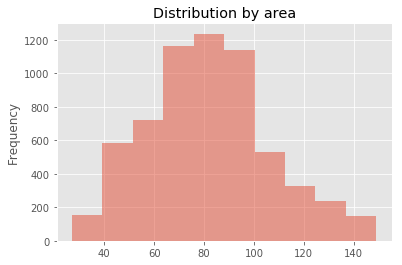

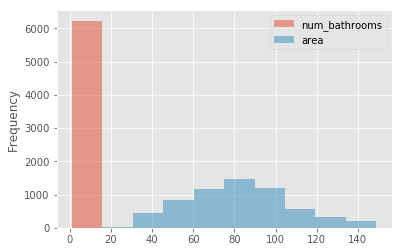

In [154]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot') # Look Pretty
# If the above line throws an error, use plt.style.use('ggplot') instead

my_series = df.area
my_dataframe = df[['num_bathrooms', 'area']] 

my_series.plot.hist(alpha=0.5)
plt.title("Distribution by area")   
my_dataframe.plot.hist(alpha=0.5)
plt.show()

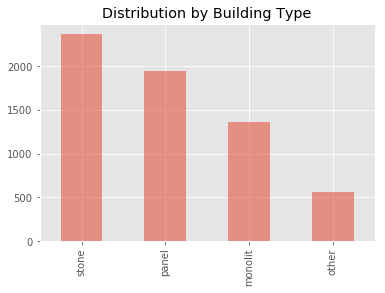

In [123]:
# specifies the parameters of our graphs
alpha_bar_chart = 0.55

# plots a bar graph of those who surived vs those who did not.               
df.building_type.value_counts().plot(kind='bar', alpha=alpha_bar_chart)

# puts a title on our graph
plt.title("Distribution by Building Type")    
plt.show()

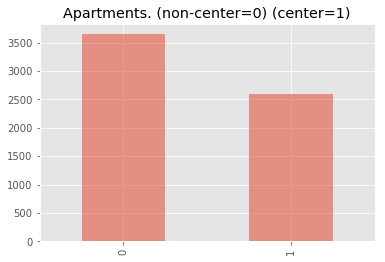

In [155]:
df.district_Center.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# specifies the parameters of our graphs
plt.title("Apartments. (non-center=0) (center=1)")
plt.show()

In [156]:
df.condition.unique()

array(['good', 'newly repaired', 'zero condition'], dtype=object)

### Density plot

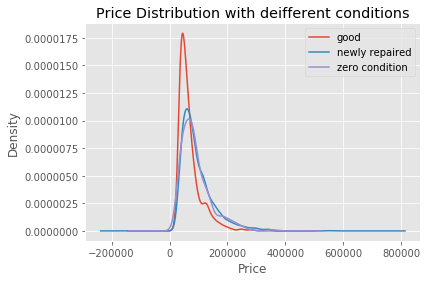

In [157]:
df.price[df.condition == 'good'].plot(kind='kde')    
df.price[df.condition == 'newly repaired'].plot(kind='kde')
df.price[df.condition == 'zero condition'].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Price")    
plt.title("Price Distribution with deifferent conditions")
# sets our legend for our graph.
plt.legend(('good', 'newly repaired','zero condition'),loc='best') 
plt.show()

### Scatterplot
Similar to histograms, scatter plots are also one of the Seven Basic Tools of Quality. Let's get them added to your arsenal, starting with the 2D variant.

2D scatter plots are used to visually inspect if a correlation exist between the charted features. Both axes of a 2D scatter plot represent a distinct, numeric feature. They don't have to be continuous, but they must at least be ordinal since each record in your dataset is being plotted as a point with its location along the axes corresponding to its feature values. Without ordering, the position of the plots would have no meaning.

It is possible that either a negative or positive correlation exist between the charted features, or alternatively, none at all. The correlation type can be assessed through the overall diagonal trending of the plotted points.

Positive and negative correlations may further display a linear or non-linear relationship. If a straight line can be drawn through your scatter plot and most of points seem to stick close to it, then it can be said with a certain level of confidence that there is a linear relationship between the plotted features. Similarly, if a curve can be drawn through the points, there is likely a non-linear relationship. If neither a curve nor line adequately seems to fit the overall shape of the plotted points, chances are there is neither a correlation nor relationship between the features, or at least not enough information at present to determine.

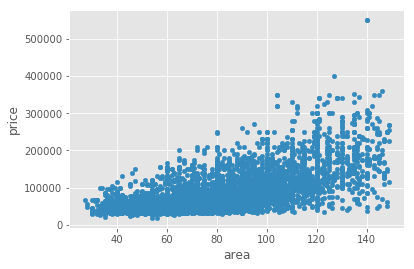

In [158]:
matplotlib.style.use('ggplot') # Look Pretty
# If the above line throws an error, use plt.style.use('ggplot') instead

df.plot.scatter(x='area', y='price')
plt.show()

This are basic 2D scatter plots. Notice you have to call .scatter on a dataframe rather than a series, since two features are needed rather than just one. You also have to specify which features within the dataset you want graphed. You'll be using scatter plots so frequently in your data analysis you should also know how to create them directly from MatPlotLib, in addition to knowing how to graph them from Pandas. This is because many Pandas methods actually return regular NumPy NDArrays, rather than fully qualified Pandas dataframes.

This plot shows us that there certainly seems to be a positive correlation and linear relationship between a student's first and final exam scores—except for those few students at the bottom of the barrel! None of them did great on their first exam, and they all completely bombed their finals; if only there were a way to chart more than two variables simultaneously, perhaps you could verify if some other variable were at play in causing the students to fail...

Scatter plots are effective in communicating data by mapping a feature to spatial dimensions, which we understand intuitively. However, you and I are limited in that we lose the ability to easily and passively comprehend an image past three spatial dimensions. It takes a great deal of thought and even more creativity to push the envelope any further. You can introduce a time dimension using animations, but it really doesn't get much better than that.

Real world datasets often have tens of features, if not more. Sparse datasets can have tens of thousands of features. What are your visualization options if when you have a dataset with more than three dimensions?

Now that we have a basic understanding of what we are trying to predict, let’s predict it.
## Supervised Machine Learning
#### Logistic Regression:

As explained by Wikipedia:
>In statistics, logistic regression or logit regression is a type of regression analysis used for predicting the outcome of a categorical dependent variable (a dependent variable that can take on a limited number of values, whose magnitudes are not meaningful but whose ordering of magnitudes may or may not be meaningful) based on one or more predictor variables. That is, it is used in estimating empirical values of the parameters in a qualitative response model. The probabilities describing the possible outcomes of a single trial are modeled, as a function of the explanatory (predictor) variables, using a logistic function. Frequently (and subsequently in this article) "logistic regression" is used to refer specifically to the problem in which the dependent variable is binary—that is, the number of available categories is two—and problems with more than two categories are referred to as multinomial logistic regression or, if the multiple categories are ordered, as ordered logistic regression.
Logistic regression measures the relationship between a categorical dependent variable and one or more independent variables, which are usually (but not necessarily) continuous, by using probability scores as the predicted values of the dependent variable.[1] As such it treats the same set of problems as does probit regression using similar techniques.

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [179]:
# model formula
# here the ~ sign is an = sign, and the features of our dataset
# are written as a formula to predict survived. The C() lets our 
# regression know that those variables are categorical.
# Ref: http://patsy.readthedocs.org/en/latest/formulas.html
formula = 'district_Center ~ C(building_type) + num_rooms + area + price + C(condition)' 
# create a results dictionary to hold our regression results for easy analysis later        
results = {} 

In [180]:
# create a regression friendly dataframe using patsy's dmatrices function
y,x = dmatrices(formula, data=df, return_type='dataframe')

# instantiate our model
model = sm.Logit(y,x)

# fit our model to the training data
res = model.fit()

# save the result for outputing predictions later
results['Logit'] = [res, formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.451318
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        district_Center   No. Observations:                 6234
Model:                          Logit   Df Residuals:                     6225
Method:                           MLE   Df Model:                            8
Date:                Mon, 15 May 2017   Pseudo R-squ.:                  0.3350
Time:                        20:52:08   Log-Likelihood:                -2813.5
converged:                       True   LL-Null:                       -4230.9
                                        LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
Intercept                         -1.2775      0.161     -7.946      0.000        -1.593    -0.962
C(building_type)[T.other]          0.8822      0.138      6.412      0.000         0.613     1.152
C(building_type)[T.panel]          1.2300      0.110     11.156      0.000         1.014     1.446
C(building_type)[T.stone]          0.8970      0.099      9.041      0.000         0.703     1.091
C(condition)[T.newly repaired]    -0.5745      0.076     -7.537      0.000        -0.724    -0.425
C(condition)[T.zero condition]     1.0119      0.130      7.762      0.000         0.756     1.267
num_rooms                         -0.3657      0.065     -5.607      0.000        -0.494    -0.238
area                              -0.0459      0.003    -15.998      0.000        -0.052    -0.040
price                           6.086e-05   1.75e-06     34.864      0.000      5.74e-05  6.43e-05
==================================================================================================
"""

In [209]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
model = LogisticRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

C:\Users\Hakob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\Hakob\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


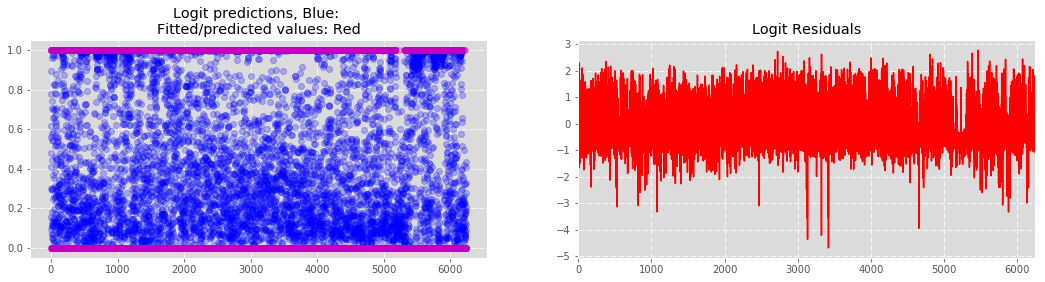

In [202]:
# Plot Predictions Vs Actual
plt.figure(figsize=(18,4));
plt.subplot(121, axisbg="#DBDBDB")
# generate predictions from our fitted model
ypred = res.predict(x)
plt.plot(x.index, ypred, 'bo', x.index, y, 'mo', alpha=.25);
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red');

# Residuals
ax2 = plt.subplot(122, axisbg="#DBDBDB")
plt.plot(res.resid_dev, 'r-')
plt.grid(color='white', linestyle='dashed')
ax2.set_xlim(-1, len(res.resid_dev))
plt.title('Logit Residuals');



### My logistic regression
Now let's compute the predicition accuracy using my model

In [203]:
import logistic_regression
from logistic_regression import gradient_descent
from logistic_regression import sigmoid

In [198]:
def accuracy_score(Y_true, Y_predict):
    accuracy = 0
    for i in range(len(Y_true)):
        if Y_true[i] == Y_predict[i]:
            accuracy = accuracy + 1
    return accuracy / len(Y_true)

In [207]:
beta = gradient_descent(np.column_stack((np.ones(len(X_train)), X_train)), y_train, max_steps=5)
all_accuracies_log_reg = []
y_pred_log_reg = []
for i in range(X_test.shape[0]):
    sigm = sigmoid((np.column_stack((np.ones(len(X_test)), X_test))).dot(beta))
    if sigm[i] >= 0.5:
        y_pred_log_reg.append(1)
    else:
        y_pred_log_reg.append(0)
accuracy_log_reg = accuracy_score(np.array(y_test), np.array(y_pred_log_reg))
all_accuracies_log_reg.append(accuracy_log_reg)

print("My Logistic Regression (In)Accuracy = ", np.mean(all_accuracies_log_reg))

My Logistic Regression (In)Accuracy =  0.582197273456


C:\Users\Hakob\Desktop\subjects\DataSci_and_ML\ML_Arsen_M\stuff_to_work_on\Intro_to_python_by_Oleg_Ponomarev\pandas\logistic_regression.py:30: RuntimeWarning: invalid value encountered in true_divide
  X[:,i] = (X[:,i] - mu[i]*np.ones(X.shape[0]) )/(sigma[i])
C:\Users\Hakob\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in greater_equal


As one can see, my Logistic Regression (In)Accuracy = 0.582197273456, which is quite poor. That's because I haven't used regularization in my model. 
As a comparison, below is shown "sklearn's" Logistic Regression accuracy:

In [210]:
print(metrics.accuracy_score(y_test, predicted))

0.78027265437


### Random Forest

"Well, What if this line / decision boundary thing doesn’t work at all."

**Wikipedia, crystal clear as always:**
>Random forests are an ensemble learning method for classification (and regression) that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes output by individual trees.

**Once again, the skinny and why it matters to you:**

There are always skeptics, and you just might be one about all the fancy lines we've created so far. Well for you, here’s another option; the Random Forest. This technique is a form of non-parametric modeling that does away with all those equations we created above, and uses raw computing power and a clever statistical observation to tease the structure out of the data. 

An anecdote to explain how this the forest works starts with the lowly gumball jar. We've all guess how many gumballs are in that jar at one time or another, and odds are not a single one of us guessed exactly right. Interestingly though, while each of our individual guesses for probably were wrong, the average of all of the guesses, if there were enough, usually comes out to be pretty close to the actual number of gumballs in the jar. Crazy, I know.  This idea is that clever statistical observation that lets random forests work.

**How do they work?** A random forest algorithm randomly generates many extremely simple models to explain the variance observed in random subsections of our data.  These models are like our gumball guesses. They are all awful individually. Really awful. But once they are averaged, they can be powerful predictive tools. The averaging step is the secret sauce. While the vast majority of those models were extremely poor; they were all as bad as each other on average. So when their predictions are averaged together, the bad ones average their effect on our model out to zero. The thing that remains, *if anything*, is one or a handful of those models have stumbled upon the true structure of the data.
The cell below shows the process of instantiating and fitting a random forest, generating predictions form the resulting model, and then scoring the results.

In [212]:
# import the machine learning library that holds the randomforest
import sklearn.ensemble as ske

# Create the random forest model and fit the model to our training data
y, x = dmatrices(formula, data=df, return_type='dataframe')
# RandomForestClassifier expects a 1 demensional NumPy array, so we convert
y = np.asarray(y).ravel()
#instantiate and fit our model
results_rf = ske.RandomForestClassifier(n_estimators=100).fit(x, y)

# Score the results
score = results_rf.score(x, y)
print("Mean accuracy of Random Forest Predictions on the data was: {0}".format(score))

Mean accuracy of Random Forest Predictions on the data was: 0.9812319538017324




### My random forest
Using my random forest model

In [215]:
import random_forest
from random_forest import RandomForest

In [218]:
NUMBER_OF_TREES = 10
MAX_TREE_DEPTH_RF = 50
RATIO_PER_TREE = 0.25
all_accuracies_forest = []
train_data = train_data = np.column_stack((X_train, y_train))
classifier_forest = RandomForest(NUMBER_OF_TREES, MAX_TREE_DEPTH_RF, RATIO_PER_TREE)
classifier_forest.fit(train_data)
y_pred_forest = classifier_forest.predict(X_test)
accuracy_forest = accuracy_score(np.array(y_test), np.array(y_pred_forest))
all_accuracies_forest.append(accuracy_forest)
print("Random Forest Accuracy = ", np.mean(all_accuracies_forest))

Random Forest Accuracy =  0.602245388933


In [241]:
d = {'Classifier params'  :   pd.Series(['random_state=1',
                                       ('step_size=1e-4 ', 'max_steps=1000'),
                                       ('n_estimators=100'), 
                                       ('10 tress','Max_dpt= 50', 'ratio_per_tree=0.25')], 
                                       index=['sklearn Logistic Regression', 'My Logistic Regression', 
                                             'sklearn Random Forest', 'My Random Forest']),
     'Train Dataset size' :   pd.Series([0.8, 0.8, 0.8, 0.8],     
                                       index=['sklearn Logistic Regression', 'My Logistic Regression', 
                                             'sklearn Random Forest', 'My Random Forest']),
     'Test Dataset Size'  :   pd.Series([0.2, 0.2, 0.2, 0.2], 
                                       index=['sklearn Logistic Regression', 'My Logistic Regression', 
                                             'sklearn Random Forest', 'My Random Forest']),
     'Accuracy'           :   pd.Series([0.78027265437, 0.582197273456, 0.9812319538017324, 0.602245388933], 
                                       index=['sklearn Logistic Regression', 'My Logistic Regression', 
                                             'sklearn Random Forest', 'My Random Forest'])
    }

##### The below table sums up the results with the parameters used

In [242]:
summary = pd.DataFrame(d)
summary

,Accuracy,Classifier params,Test Dataset Size,Train Dataset size
sklearn Logistic Regression,0.780273,random_state=1,0.2,0.8
My Logistic Regression,0.582197,"(step_size=1e-4 , max_steps=1000)",0.2,0.8
sklearn Random Forest,0.981232,n_estimators=100,0.2,0.8
My Random Forest,0.602245,"(10 tress, Max_dpt= 50, ratio_per_tree=0.25)",0.2,0.8
